In [89]:
# import libraries to open text files
import numpy as np
import pandas as pd
# import libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
# Read data in dataframe
df=pd.read_csv('/Users/MiaHuang/Desktop/Churn_Prediction_Telco_Customer/Resources/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


understand the data and clean the data

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 After reviewing the data and found that data type for the TotalCharges column is seen as object but has numeric type values. So let's convert it to the numeric type.

In [92]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [94]:
# Check for null values in TotalCharges Column
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We can see that there are only 7032 values in TotalCharges column as we should have 7043 values. Since the missing part is only a very small portion of the data, we can drop the rows.

In [60]:
df.dropna(inplace=True)

In [61]:
#change all the columns to numeric before training model
df['gender'] = df['gender'].map({'Male':1 ,'Female':2})
df['Partner'] = df['Partner'].map({'Yes':1 ,'No':0})
df['Dependents'] = df['Dependents'].map({'Yes':1 ,'No':0})
df['PhoneService'] = df['PhoneService'].map({'Yes':1 ,'No':0})  
df['MultipleLines'] = df['MultipleLines'].map({'Yes':1 ,'No':0,'No phone service':0})  
df['InternetService'] = df['InternetService'].map({'Fiber optic':2,'DSL':1 ,'No':0})  
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes':1 ,'No':0,'No internet service':0})  
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes':1 ,'No':0,'No internet service':0})  
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes':1 ,'No':0,'No internet service':0})  
df['TechSupport'] = df['TechSupport'].map({'Yes':1 ,'No':0,'No internet service':0})  
df['StreamingTV'] = df['StreamingTV'].map({'Yes':1 ,'No':0,'No internet service':0})  
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes':1 ,'No':0,'No internet service':0}) 
df['Contract'] = df['Contract'].map({'Month-to-month':0 ,'One year':1,'Two year':2}) 
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1 ,'No':0}) 
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check':0 ,'Mailed check':1,'Bank transfer (automatic)':2 ,'Credit card (automatic)':3}) 

In [62]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,No
4,9237-HQITU,2,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,Yes


let's drop the customerID column as we don't need it to test and train the data

In [63]:
df.drop(['customerID'], axis=1, inplace=True)
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,No
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,No
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,No
4,2,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,Yes
5,2,0,0,0,8,1,1,2,0,0,1,0,1,1,0,1,0,99.65,820.50,Yes
6,1,0,0,1,22,1,1,2,0,1,0,0,1,0,0,1,3,89.10,1949.40,No
7,2,0,0,0,10,0,0,1,1,0,0,0,0,0,0,0,1,29.75,301.90,No
8,2,0,1,0,28,1,1,2,0,0,1,1,1,1,0,1,0,104.80,3046.05,Yes
9,1,0,0,1,62,1,0,1,1,1,0,0,0,0,1,0,2,56.15,3487.95,No


Now let's train and test the data with X be all data without 'Churn' column and y be only the 'churn' column

In [64]:
from sklearn.model_selection import train_test_split
X=df.drop(['Churn'], axis=1)
y=df['Churn']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [65]:
y_train.value_counts()

No     3585
Yes    1337
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Churn'>

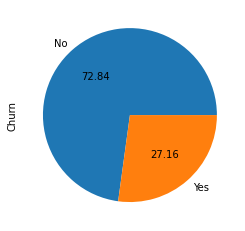

In [66]:
y_train.value_counts().plot.pie(autopct='%.2f')

As you can see from the chart, the dataset is imbalanced. Let's fix it.

In [67]:
from imblearn.over_sampling import RandomOverSampler 

ros= RandomOverSampler(sampling_strategy=1)
X_train,y_train =ros.fit_resample(X,y)
y_train.value_counts()

No     5163
Yes    5163
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Churn'>

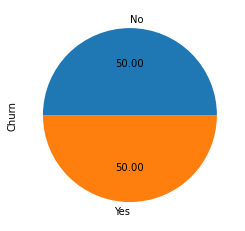

In [68]:
y_train.value_counts().plot.pie(autopct='%.2f')

Let's use RandomForest to predict.

In [70]:
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=100)
classifier_churn =classifier.fit(X_train,y_train)

In [71]:
# The model creates predicted y_value (churn or not churn) based on X value
y_pred=classifier.predict(X_test)
print(y_pred)

['Yes' 'No' 'No' ... 'No' 'No' 'No']


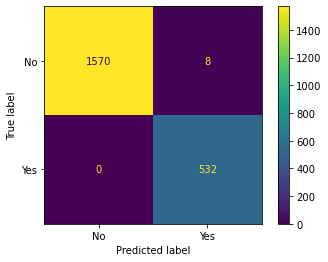

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(cm, display_labels=classifier_churn.classes_)
disp.plot()

In [79]:
# Let's take a look at the result and compare the test y value to the predicted y value.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      0.99      1.00      1578
         Yes       0.99      1.00      0.99       532

    accuracy                           1.00      2110
   macro avg       0.99      1.00      0.99      2110
weighted avg       1.00      1.00      1.00      2110



In [81]:
# Now let's take a look which has the most impact on the customers churn 
co=pd.DataFrame({'Feature':X_train.columns.tolist(), 'Feature_importances': classifier_churn.feature_importances_})
co.sort_values(by=['Feature_importances'])


,Feature,Feature_importances
5,PhoneService,0.006952
12,StreamingTV,0.015224
6,MultipleLines,0.015931
10,DeviceProtection,0.016441
13,StreamingMovies,0.016745
1,SeniorCitizen,0.017900
9,OnlineBackup,0.018913
3,Dependents,0.019404
2,Partner,0.021076
8,OnlineSecurity,0.021237


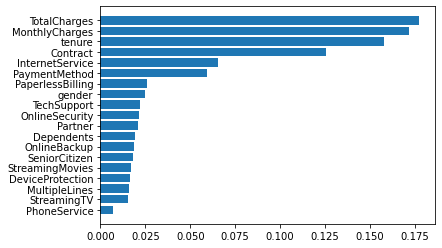

In [85]:
co=co.sort_values(by=['Feature_importances'])
plt.barh(co['Feature'], co['Feature_importances'])
plt.show()